# Prova final, 2021-2

Nas nossas aulas usamos bastante a base de dados “sakila”, que modela uma cadeia de locadoras de DVD.
Nos itens a seguir usaremos apenas um subconjunto das tabelas da base “sakila”, conforme visto abaixo:

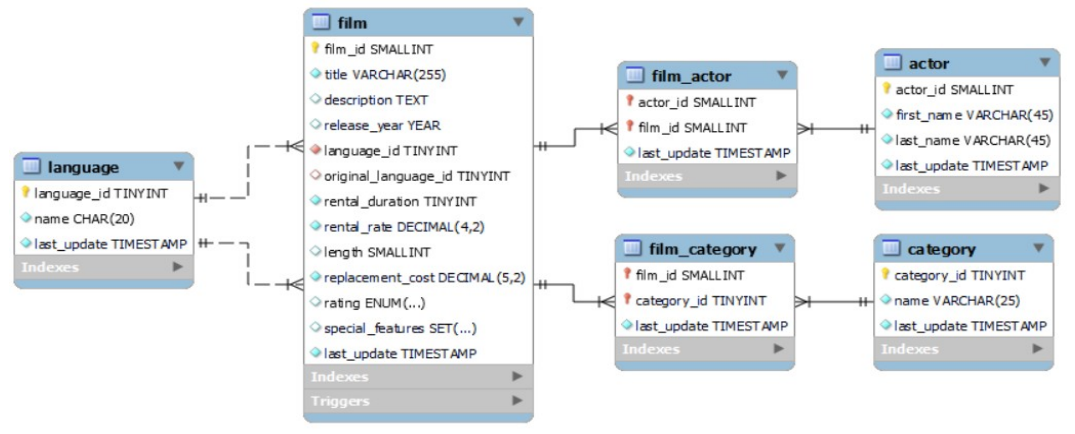

## 1)

Escreva queries SQL para responder as perguntas abaixo:

a) Alguns atores são supersticiosos. Um ator supersticioso prefere participar em filmes cujo titulo começa
com a mesma letra de seu primeiro nome. Por exemplo, se um ator chamado “Adam West” é
supersticioso, ele prefere atuar em filmes que começam com a letra “A”.

Quais os 10 atores mais supersticiosos? Considere que o escore de superstição de um ator é a fração de
filmes do ator que começam com a mesma letra do nome dele.

Dica: para extrair a primeira letra de uma string use a função LEFT(str, quantidade) do MySQL. Consulte a
documentação conforme necessário.


In [1]:
import mysql.connector
from functools import partial


def get_connection_helper():

    def run_db_query(connection, query, args=None):
        with connection.cursor() as cursor:
            print('Executando query:')
            cursor.execute(query, args)
            for result in cursor:
                print(result)

    connection = mysql.connector.connect(
        host='localhost',
        user='megadados',
        password='megadados',
        database='sakila',
    )
    return connection, partial(run_db_query, connection)


connection, db = get_connection_helper()

In [27]:
db('''DROP TABLE IF EXISTS total_films''')

db('''
CREATE TEMPORARY TABLE total_films
    SELECT 
        first_name, last_name, actor_id, COUNT(film_id) as total
    FROM
        actor
        INNER JOIN film_actor USING (actor_id)
        INNER JOIN film USING (film_id)
    GROUP BY
        actor_id
    ORDER BY
        total DESC
''')


db('SELECT * FROM total_films')

Executando query:
Executando query:
Executando query:
('GINA', 'DEGENERES', 107, 42)
('WALTER', 'TORN', 102, 41)
('MARY', 'KEITEL', 198, 40)
('MATTHEW', 'CARREY', 181, 39)
('SANDRA', 'KILMER', 23, 37)
('SCARLETT', 'DAMON', 81, 36)
('UMA', 'WOOD', 13, 35)
('VAL', 'BOLGER', 37, 35)
('HENRY', 'BERRY', 60, 35)
('GROUCHO', 'DUNST', 106, 35)
('ANGELA', 'WITHERSPOON', 144, 35)
('VIVIEN', 'BASINGER', 158, 35)
('ANGELA', 'HUDSON', 65, 34)
('KIRSTEN', 'AKROYD', 92, 34)
('SIDNEY', 'CROWE', 105, 34)
('WARREN', 'NOLTE', 108, 34)
('JAYNE', 'NOLTE', 150, 34)
('RIP', 'CRAWFORD', 26, 33)
('JULIA', 'MCQUEEN', 27, 33)
('BEN', 'WILLIS', 83, 33)
('SEAN', 'GUINESS', 90, 33)
('KENNETH', 'TORN', 94, 33)
('SUSAN', 'DAVIS', 101, 33)
('CAMERON', 'ZELLWEGER', 111, 33)
('RENEE', 'TRACY', 117, 33)
('KEVIN', 'GARLAND', 127, 33)
('EWAN', 'GOODING', 139, 33)
('ALBERT', 'JOHANSSON', 146, 33)
('RENEE', 'BALL', 187, 33)
('REESE', 'WEST', 197, 33)
('HELEN', 'VOIGHT', 17, 32)
('REESE', 'KILMER', 45, 32)
('NATALIE', 'HOPKIN

In [28]:
db('''DROP TABLE IF EXISTS filme_ator_filtrado''')

db('''
CREATE TEMPORARY TABLE filme_ator_filtrado
    SELECT 
        first_name, last_name, actor_id, COUNT(film_id) as filme_filtrado
    FROM
        actor
        INNER JOIN film_actor USING (actor_id)
        INNER JOIN film USING (film_id)
    WHERE
        LEFT(first_name, 1) = LEFT(film.title, 1)
    GROUP BY
        actor_id
    ORDER BY
        filme_filtrado DESC
''')

db('SELECT * FROM filme_ator_filtrado')

Executando query:
Executando query:
Executando query:
('SANDRA', 'KILMER', 23, 10)
('CAMERON', 'STREEP', 24, 7)
('SEAN', 'GUINESS', 90, 6)
('SPENCER', 'DEPP', 100, 6)
('MARY', 'KEITEL', 198, 6)
('CHRISTIAN', 'AKROYD', 58, 5)
('SUSAN', 'DAVIS', 101, 5)
('SIDNEY', 'CROWE', 105, 5)
('FAY', 'WINSLET', 147, 5)
('MATTHEW', 'CARREY', 181, 5)
('SEAN', 'WILLIAMS', 72, 4)
('CHARLIZE', 'DENCH', 89, 4)
('SCARLETT', 'BENING', 124, 4)
('DARYL', 'CRAWFORD', 129, 4)
('MICHAEL', 'BOLGER', 185, 4)
('BETTE', 'NICHOLSON', 6, 3)
('LUCILLE', 'TRACY', 20, 3)
('WOODY', 'HOFFMAN', 28, 3)
('TOM', 'MIRANDA', 42, 3)
('MENA', 'TEMPLE', 53, 3)
('FAY', 'KILMER', 55, 3)
('WOODY', 'JOLIE', 82, 3)
('BEN', 'WILLIS', 83, 3)
('MINNIE', 'ZELLWEGER', 85, 3)
('CHRISTOPHER', 'BERRY', 91, 3)
('CHRIS', 'BRIDGES', 98, 3)
('WALTER', 'TORN', 102, 3)
('GINA', 'DEGENERES', 107, 3)
('SYLVESTER', 'DERN', 109, 3)
('CAMERON', 'ZELLWEGER', 111, 3)
('RENEE', 'TRACY', 117, 3)
('CUBA', 'ALLEN', 118, 3)
('PENELOPE', 'MONROE', 120, 3)
('MORGA

In [31]:
db('''
SELECT 
    total_films.first_name, total_films.last_name, filme_filtrado/total 
FROM
    total_films
    LEFT OUTER JOIN filme_ator_filtrado USING (actor_id)
ORDER BY
    filme_filtrado/total DESC

''')

Executando query:
('CAMERON', 'STREEP', Decimal('0.2917'))
('SANDRA', 'KILMER', Decimal('0.2703'))
('SPENCER', 'DEPP', Decimal('0.2500'))
('SEAN', 'GUINESS', Decimal('0.1818'))
('CHARLIZE', 'DENCH', Decimal('0.1667'))
('FAY', 'WINSLET', Decimal('0.1613'))
('CHRISTIAN', 'AKROYD', Decimal('0.1563'))
('SEAN', 'WILLIAMS', Decimal('0.1538'))
('SCARLETT', 'BENING', Decimal('0.1538'))
('SUSAN', 'DAVIS', Decimal('0.1515'))
('MARY', 'KEITEL', Decimal('0.1500'))
('BETTE', 'NICHOLSON', Decimal('0.1500'))
('FAY', 'KILMER', Decimal('0.1500'))
('CHRISTOPHER', 'BERRY', Decimal('0.1500'))
('SIDNEY', 'CROWE', Decimal('0.1471'))
('SYLVESTER', 'DERN', Decimal('0.1364'))
('DARYL', 'CRAWFORD', Decimal('0.1333'))
('MICHAEL', 'BOLGER', Decimal('0.1333'))
('BURT', 'TEMPLE', Decimal('0.1304'))
('MATTHEW', 'CARREY', Decimal('0.1282'))
('CUBA', 'ALLEN', Decimal('0.1200'))
('GROUCHO', 'WILLIAMS', Decimal('0.1200'))
('GEOFFREY', 'HESTON', Decimal('0.1154'))
('TOM', 'MIRANDA', Decimal('0.1111'))
('CHRIS', 'BRIDGES'

b) Quais os atores que não participaram de nenhum filme com classificação indicativa (rating) “R”?

In [38]:
db('''DROP TABLE IF EXISTS atores_filme_R''')


db('''
CREATE TEMPORARY TABLE atores_filme_R
    SELECT 
        actor.first_name, actor.last_name, actor_id, COUNT(film_id) as filmes_R
    FROM
        actor
        INNER JOIN film_actor USING (actor_id)
        INNER JOIN film USING (film_id)
    WHERE
        rating = "R"
    GROUP BY
        actor_id
    ORDER BY
        actor.first_name
''')

db('SELECT * FROM atores_filme_R')

Executando query:
Executando query:
Executando query:
('ADAM', 'GRANT', 71, 1)
('ADAM', 'HOPPER', 132, 3)
('AL', 'GARLAND', 165, 4)
('ALAN', 'DREYFUSS', 173, 3)
('ALBERT', 'NOLTE', 125, 5)
('ALBERT', 'JOHANSSON', 146, 10)
('ALEC', 'WAYNE', 29, 3)
('ANGELA', 'WITHERSPOON', 144, 4)
('ANGELA', 'HUDSON', 65, 2)
('ANGELINA', 'ASTAIRE', 76, 7)
('ANNE', 'CRONYN', 49, 4)
('AUDREY', 'OLIVIER', 34, 5)
('AUDREY', 'BAILEY', 190, 6)
('BELA', 'WALKEN', 196, 3)
('BEN', 'HARRIS', 152, 1)
('BEN', 'WILLIS', 83, 6)
('BETTE', 'NICHOLSON', 6, 4)
('BOB', 'FAWCETT', 19, 2)
('BURT', 'TEMPLE', 193, 2)
('BURT', 'DUKAKIS', 36, 8)
('BURT', 'POSEY', 75, 4)
('CAMERON', 'ZELLWEGER', 111, 2)
('CAMERON', 'STREEP', 24, 5)
('CAMERON', 'WRAY', 63, 2)
('CARMEN', 'HUNT', 52, 3)
('CARY', 'MCCONAUGHEY', 77, 5)
('CATE', 'HARRIS', 141, 4)
('CATE', 'MCQUEEN', 128, 3)
('CHARLIZE', 'DENCH', 89, 5)
('CHRIS', 'BRIDGES', 98, 7)
('CHRIS', 'DEPP', 160, 3)
('CHRISTIAN', 'NEESON', 61, 3)
('CHRISTIAN', 'GABLE', 10, 3)
('CHRISTIAN', 'AKRO

In [40]:
db('''
SELECT 
    actor.first_name, actor.last_name, actor_id, filmes_R
FROM
    actor
    LEFT OUTER JOIN atores_filme_R USING (actor_id)
WHERE
    filmes_R IS NULL
''')

Executando query:
('JANE', 'JACKMAN', 131, None)


c) Suponha que desejamos adicionar uma coluna na tabela “actor” que contêm a contagem de filmes no
qual o ator participa. Implemente em SQL o mecanismo necessário para manter essa contagem correta
sempre que um filme for adicionado ou removido.

trigger de update - para atualizar a ibfo naquela linha
Tem a info vindo para alterar que é o NEW. Então a gente setta o NEW - old .

## 2)

O site lichess.org permite que pessoas do mundo todo joguem xadrez online (mesmo com deficiência
visual!). É gratuito, funciona com doações (lichess.org é uma instituição sem fins lucrativos na França) que
servem para sustentar o custo dos servidores (web app, varios bancos de dados, sistemas de análise de jogos
– e.g. stockfish – etc.) e o salário do desenvolvedor principal e criador da plataforma. O código-fonte é
aberto, e desenvolvido principalmente em Scala (pelas vantagens da programação funcional, vejam só!).
Na página de doações (https://lichess.org/patron) tem uma planilha de custos que lista todos os servidores,
suas capacidades e custos. Tem também um dado interessante: são 5.200.000 jogos por dia atualmente!
Suponha que cada jogo tem em média 50 lances, que cada lance pode ser armazenado como um par de
bytes indicando a casa de origem e destino de uma peça. Suponha ainda que o número de jogos por ano
dobra a cada ano. A planilha de custos do lichess informa que o servidor de banco de dados tem 3840 GB de
disco; suponha que 1TB ainda esteja livre para armazenamento de dados. A partir de agora, quantos anos de
armazenamento de jogos o servidor ainda aguenta?

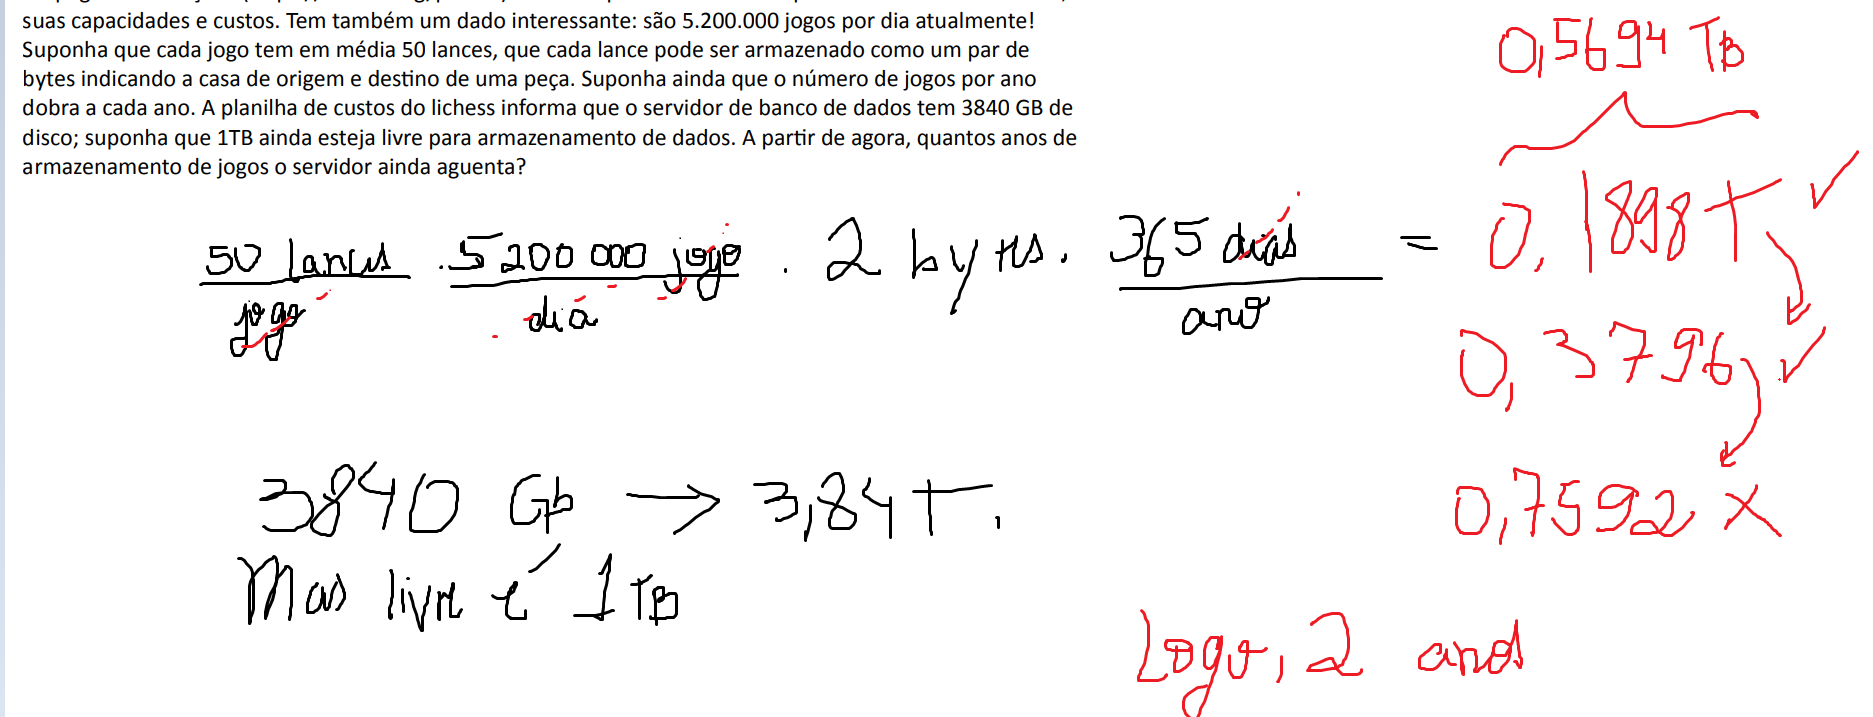

In [44]:
def g(t):
    return 50 * 2 * 5_200_000 * 2 **(t/365.0)

N=10000

soma = 0

for t in range(N):
    soma += g(t)
    if soma > 1e12:
        break

print(t/365)

2.2164383561643834


## 3 )
Explique com suas palavras: porque o Spark é baseado em um paradigma de programação funcional?

Transformação de dados com muitos dados.

O Spark é uma ferramenta de ETL (extract, transform e load).

Nesse caso, informações relevantes são extraídas, essas informações são transformadas e depois são carregadas em um banco de dados. Como se fosse uma pipeline, ou de maneira mais geral, como se fosse um DAG (directed acyclic graph). 

Nesse caso temos uma fonte, vários processos e destinos. Dessa forma, podemos modelar por funções.
- Pode ser bem modelada por chamadas de função e fluxos de dados sem side effects (depende apenas da entrada dele, não mais de outras coisas). Além disso, itens de dados são independentes

E por que é vantajoso adotar o resto o paradigma funcional? Como isso influencia na implementação?

- Pode implementar com funções sem side effect (chamada de função que altera o estado global sendo que a função depende - se chamar 2 vezes, os resultados serão diferentes - não é paralelizável e nem cacheavel). 
- Itens independentes - posso processar em qualquer ordem - são processáveis em paralelo, isto implica que programação funcional é uma boa ideia, pois possui:
        - Paralelismo: uma chamada de funçã não depende de outra, um item processado não afeta outro item.
        - Usar múltiplos processadores separados (diferença entre máquinas multi core e em cluster). No caso temos o cluster- sem compartilhar o estado global.
        - Robustez: se uma unidade de processamento é perdida, podemos apenas recomputar o que foi perdido - ou seja, se o processador cai, recomputa apenas o necessário.
        - Na programação funcional, podemos passar funções e receber funções. O argumento de entrada do 'map' é uma função. Ou seja, funções como objetos de primeira classe.
        

**O RESUMO** : programação funcional implica em : 
    - Sem efeitos colaterais.
    - Sem estado global.
    - Funções como objeto de primeira classe, permitindo enviar código para uma função.
        
E isso facilita paralelismo porque também facilita dados independentese migração de código.

-----------------------------------------------------------------------------------------------------------------

A programação funcional é inspirada em:
• Cálculo lambda, e
• Teoria de categorias

E o Spark usa o cálculo lambda para usas operações

Robustez
• Claridade
• Mais preocupada com “o que calcular” do que “como
calcular”




## 4)

Escreva uma função em Python usando apenas ferramentas de programação funcional (como map(),
functools.reduce(), filter(), zip(), list comprehensions, etc.) para a seguinte tarefa:
- São dadas duas listas x e y de números reais, de mesmo comprimento n. Cada elemento de cada lista
é um número real ou None, indicando que o número está ausente.
- A função deverá calcular a soma a seguir:

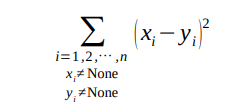

In [35]:
# Filtrando individualmente :

x = [10, 5, 6, 7, 9, -6, None, None, 4, 0]
y = [8, 6, None, 5, None, 2, 16, 4, -5, 7]

filtrado_x = list(filter(lambda x : x != None, x))
filtrado_y = list(filter(lambda y: y != None, y))

zippado = zip(filtrado_x, filtrado_y)

print(list(filtrado_x))
print(list(filtrado_y))
print(list(zippado))

somatorio = sum([(a - b)**2 for a, b in zip(filtrado_x, filtrado_y)])

print(somatorio)



[10, 5, 6, 7, 9, -6, 4, 0]
[8, 6, 5, 2, 16, 4, -5, 7]
[(10, 8), (5, 6), (6, 5), (7, 2), (9, 16), (-6, 4), (4, -5), (0, 7)]
310


In [17]:
# Ouuu filtrando tudo:

#x = [10, 5, 6, 7, 9, -6, None, None, 4, 0]
#y = [8, 6, None, 5, None, 2, 16, 4, -5, 7]

from functools import *

x = [3, None, 5, -2, None]
y = [5, None, None, 1, 3]

zipp_x_y = zip(x, y)

filtro_zip_x_y = list(filter(lambda x : x[0] != None and x[1] != None, zipp_x_y))

print(filtro_zip_x_y)

#somatorio = sum([(a - b)**2 for a, b in filtro_zip_x_y])
#somatorio = reduce(lambda x,y : x+y , (map(lambda x: (x[0] - x[1])**2, filtro_zip_x_y)), 0)
somatorio = sum(map(lambda x: (x[0] - x[1])**2, filtro_zip_x_y))

print(somatorio)



[(3, 5), (-2, 1)]
13


# 5)
Construa um par de transações que geram resultados diferentes se usamos o modo de serialização
SERIALIZABLE, REPEATABLE READ e READ COMMITTED.

Repetable read tem phantom read.
Read commited : trazer os non repeatable read

In [3]:
import mysql.connector
from functools import partial


def get_connection_helper():

    def run_db_query(connection, query, args=None):
        with connection.cursor() as cursor:
            print('Executando query:')
            cursor.execute(query, args)
            for result in cursor:
                print(result)

    connection = mysql.connector.connect(
        host='localhost',
        user='megadados',
        password='megadados',
        database='tranqueira',
    )
    return connection, partial(run_db_query, connection)


connection, db = get_connection_helper()

In [4]:
db("SET SESSION TRANSACTION ISOLATION LEVEL SERIALIZABLE")

db("START TRANSACTION")

Executando query:
Executando query:


In [5]:
db("SELECT * FROM perigo")
db('INSERT INTO perigo(Nome) VALUES ("Econômico")')
db("SELECT * FROM perigo")

Executando query:
(1, 'Cardiaco')
(2, 'Intestinal')
(3, 'Dermatologico')
(4, 'Psicológico')
(5, 'Econômico')
(8, 'Ortopédico')
Executando query:
Executando query:
(1, 'Cardiaco')
(2, 'Intestinal')
(3, 'Dermatologico')
(4, 'Psicológico')
(5, 'Econômico')
(8, 'Ortopédico')
(9, 'Econômico')


# 6)
Em uma relação R(A, B, C, D) valem as seguintes dependências funcionais não-triviais: AB→C, C→ D,
D→ A.

Determine:

d) A forma normal da relação

Para o caso de AB como chave primária: 

- Formado por colunas com valor simples [OK] 1NF Porque já é uma relação, se não nem seria.
- Não tem dependência parcial [OK]. todos os seus atributos não-chave dependem funcionalmente da chave primária inteira. é verdade, pois D depende de C, mas C é determinado pela chave primária inteira. 2NF
- Não tem dependência transitiva [X]. Possui dependência transitiva já D é determinado por C que por sua vez é determinado por AB, ou seja, D não é determinado por AB de maneira direta.  

R: 2NF

Para o caso de BD como chave primária:

- Formado por colunas com valor simples [OK] 1NF
- Não tem dependência parcial [X]. Possui dependência parcial, já que A é determinado apenas por D.

Para o caso de BC:

- Formado por colunas com valor simples [OK] 1NF
- Tem dependência parcial, pois D depende apenas de C e não de B.


e) A chave primária

Chaves candidatas : AB , BC (Do C tiro o D e tiro A) , BD (Do D eu tiro o A, com AB tiro C e com C tiro D). Escolhi AB.

AB é a chave primária, pois com essa chave, todas as outras são formadas.


f) Uma normalização para a BCNF

AB→ C, C→ D, D→ A.

Primeiro temos que passar para 3NF:

- R(A, B) → C: Chave primária AB. [AB→ C]
- S(C, D) → D : Chave primária C. [C→ D]
- T(D, A) → A : Chave primária A. [D→ A]

Último valor de A pode ser diferentes do A do AB.

Agora sim não há dependência parcial, nem dependência transitiva.
Trigger, toda vez que fizer um INSERT tem que respeitar a tabela de AB.

## BCNF

Um problema surge quando temos relações em que aparecem
dependencias funcionais (DFs) nas quais o lado esquerdo
(determinante) não é parte de uma chave candidata mas o lado
direito é. 

Chaves candidatas: PF ou PG
Exemplo: G (determinante que não faz parte da primária)→F(faz parte da primária) ; PF → G;